<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [5]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Filter out the missing values from 'ConvertedComp' colunm
df_filtered = df.dropna(subset =['ConvertedComp'])

# verify the missing value is filtered
df_filtered['ConvertedComp'].isnull().sum()

0

Plot the histogram for the column `ConvertedComp`.


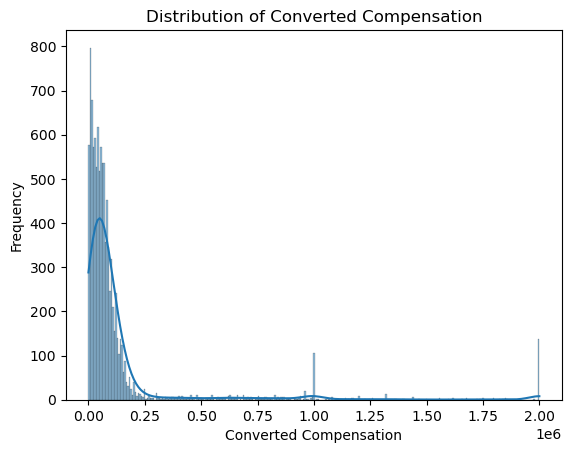

In [13]:
# your code goes here
#plot the Distribution curve
sns.histplot(df_filtered['ConvertedComp'], kde=True)
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Converted Compensation')
plt.show()

What is the median of the column `ConvertedComp`?


In [71]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [33]:
# your code goes here
df_man = df[df['Gender'] == 'Man']
df_man_single = df_man[~df_man['Gender'].str.contains(';')]
num_man_responders = df_man_single.shape[0]
print("Number of responders identified only as a man:", num_man_responders)

## the second simple solution
df['Gender'].value_counts()

Number of responders identified only as a man: 10480


Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [45]:
# your code goes here
df_woman = df[df['Gender'] == 'Woman']
# the following row i think is useless
df_woman_single = df_woman[~df_woman['Gender'].str.contains(';')]
median_converted_comp = df_woman_single['ConvertedComp'].median()
print("Median ConvertedComp of responders identified only as a woman:", median_converted_comp)


Median ConvertedComp of responders identified only as a woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [47]:
# your code goes here
age_summary = df['Age'].describe()
print("Five-Number Summary for the 'Age' column:")
print(age_summary[['min', '25%', '50%', '75%', 'max']])

Five-Number Summary for the 'Age' column:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


<Axes: xlabel='Age', ylabel='Count'>

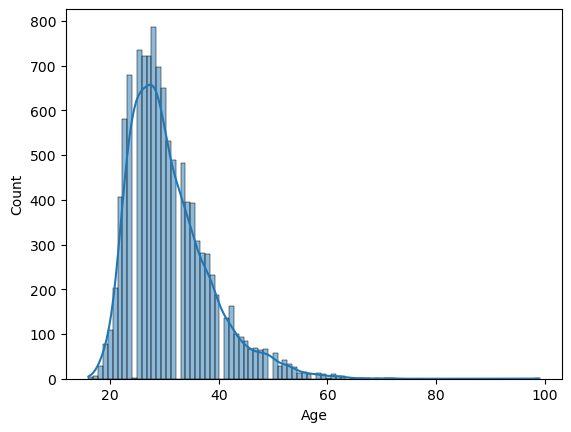

In [54]:
# your code goes here
sns.histplot(df['Age'], kde=True)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64

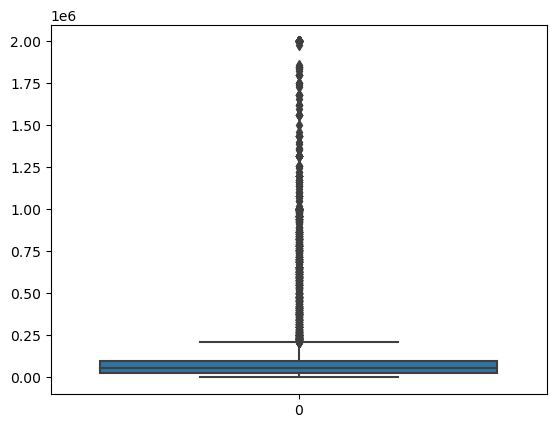

In [61]:
# your code goes here
sns.boxplot(df['ConvertedComp'])
df['ConvertedComp']

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [59]:
# your code goes here
import pandas as pd

# Assume 'df' is your DataFrame loaded from a URL or any other source

# Calculate the IQR for the 'ConvertedComp' column
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1

# Print the IQR
print("Interquartile Range (IQR) for 'ConvertedComp':", iqr)


Interquartile Range (IQR) for 'ConvertedComp': 73132.0


Find out the upper and lower bounds.


In [62]:
# your code goes here
import pandas as pd

# Assume 'df' is your DataFrame loaded from a URL or any other source

# Calculate the lower and upper bounds
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Print the lower and upper bounds
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [63]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = outliers.shape[0]
print("Number of outliers in 'ConvertedComp':", num_outliers)


Number of outliers in 'ConvertedComp': 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [73]:
# your code goes here
df_filtered = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)].copy()
df_filtered['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [68]:
# your code goes here
# Assume 'df' is your DataFrame loaded from a URL or any other source

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find the correlation between 'Age' and all other numerical columns
age_correlation = correlation_matrix['Age']

# Print the correlation values
print("Correlation between Age and other numerical columns:")
print(age_correlation)


Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


C:\Users\vic_l\AppData\Local\Temp\ipykernel_2592\3495048312.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
